In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import medfilt
import japanize_matplotlib


In [11]:
# CSVファイルを読み込む
file_path = "./log/"

df_acc = pd.read_csv(
    f"{file_path}Accelerometer.csv",
    header=0,
    names=("time", "x", "y", "z")
)


In [12]:
# 加速度のノルムを計算する
df_acc['norm'] = np.linalg.norm(df_acc[['x', 'y', 'z']], axis=1)

# フィルターをかける
window = 40
## 移動平均
df_acc['xlow'] = df_acc['x'].rolling(window=window).mean()
df_acc['ylow'] = df_acc['y'].rolling(window=window).mean()
df_acc['zlow'] = df_acc['z'].rolling(window=window).mean()

## メディアンフィルター
df_acc['xmf'] = medfilt(df_acc['x'], window + 1)
df_acc['ymf'] = medfilt(df_acc['y'], window + 1)
df_acc['zmf'] = medfilt(df_acc['z'], window + 1)


In [13]:
# グラフを描画する
def plot(
    df,
    heads=[],
    title=None,
    xlabel=None,
    ylabel=None,
    figsize=(10, 3),
    xlim=(0, 0),
    ylim=(0, 0),
    grid=True,
):
    fig = plt.figure(figsize=figsize)

    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if grid:
        plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)

    if xlim[0] < xlim[1]:
        plt.xlim(xlim[0], xlim[1])
    if ylim[0] < ylim[1]:
        plt.ylim(ylim[0], ylim[1])

    for head in heads:
        plt.plot(df[head[0]], df[head[1]], label=head[1])

    plt.legend()

    plt.show()


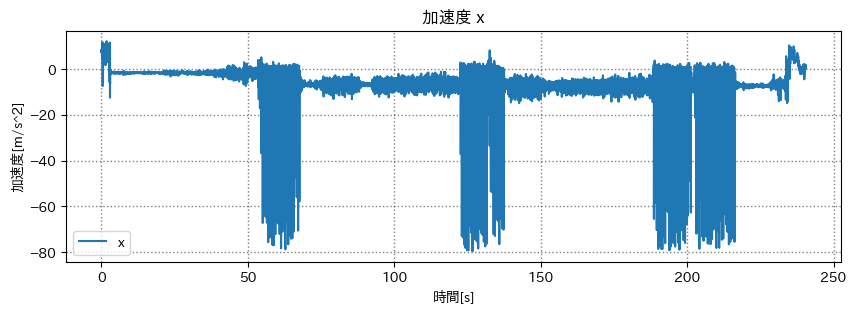

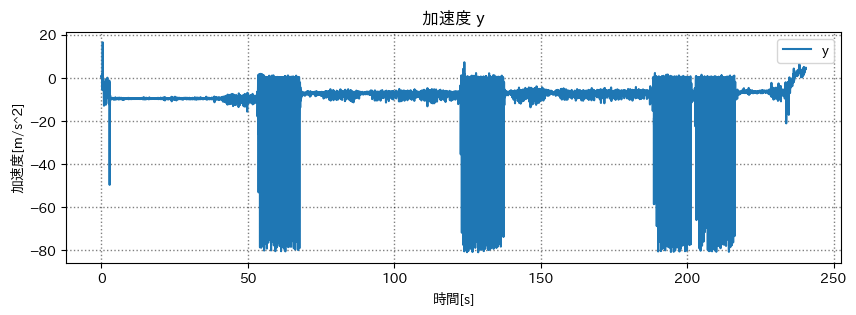

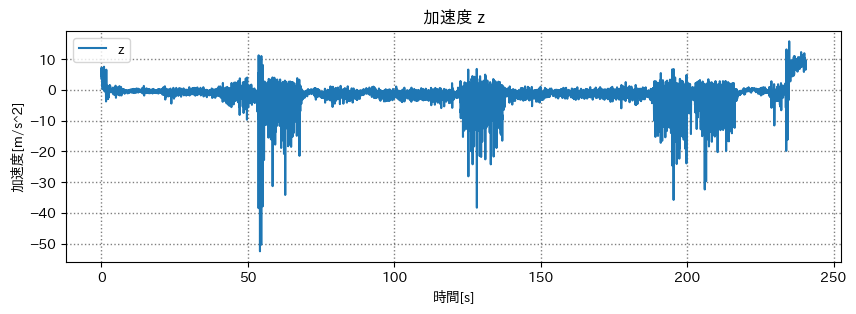

In [16]:
plot(
    df_acc,
    [("time", "x")],
    title="加速度 x",
    xlabel="時間[s]",
    ylabel="加速度[m/s^2]",
    figsize=(10, 3),
    grid=True
)

plot(
    df_acc,
    [("time", "y")],
    title="加速度 y",
    xlabel="時間[s]",
    ylabel="加速度[m/s^2]",
    figsize=(10, 3),
    grid=True
)

plot(
    df_acc,
    [("time", "z")],
    title="加速度 z",
    xlabel="時間[s]",
    ylabel="加速度[m/s^2]",
    figsize=(10, 3),
    grid=True
)